In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"/Users/ahsan/Dropbox/My Mac (Alnoors-MBP-2.hub)/Documents/OneDrive/Documents/UNSW DATA SCIENCE/Term 3 2020/Data3001 Data Science In Prac/combined_energy.csv")

In [3]:
# Checking how the data looks like
data.head(12)

,SETTLEMENTDATE,REGIONID,DISPATCHINTERVAL,RRP,ROP,TOTALDEMAND,APCFLAG,RRP5min,ROP5min
0,1/7/08 0:00,NSW1,20080630240,27.43703,27.43703,9027.49,0,2.286419,2.286419
1,1/7/08 0:00,QLD1,20080630240,24.30000,24.30000,5361.52,0,2.025000,2.025000
2,1/7/08 0:00,SA1,20080630240,29.77032,29.77032,1614.93,0,2.480860,2.480860
3,1/7/08 0:00,SNOWY1,20080630240,28.60265,28.60265,16.97,0,2.383554,2.383554
4,1/7/08 0:00,TAS1,20080630240,24.58964,24.58964,1052.28,0,2.049137,2.049137
5,1/7/08 0:00,VIC1,20080630240,27.96721,27.96721,5898.26,0,2.330601,2.330601
6,1/7/08 0:05,NSW1,20080630241,27.82000,27.82000,9067.65,0,2.318333,2.318333
7,1/7/08 0:05,QLD1,20080630241,24.81493,24.81493,5326.79,0,2.067911,2.067911
8,1/7/08 0:05,SA1,20080630241,29.70000,29.70000,1590.49,0,2.475000,2.475000
9,1/7/08 0:05,TAS1,20080630241,22.77314,22.77314,1045.30,0,1.897762,1.897762


In [4]:
data = data[data["REGIONID"] != "TAS1"]
data = data[data["REGIONID"] != "SNOWY1"]

In [5]:
data.describe()

,DISPATCHINTERVAL,RRP,ROP,TOTALDEMAND,APCFLAG,RRP5min,ROP5min
count,8.388590e+05,838859.000000,838859.000000,838859.000000,838859.000000,838859.000000,838859.000000
mean,2.009060e+10,41.808025,76.375225,5593.208486,0.008111,3.484002,6.364602
std,6.854913e+06,324.517280,3623.803471,2815.489797,0.344031,27.043107,301.983623
min,2.008063e+10,-1000.000000,-650000.000000,803.670000,0.000000,-83.333333,-54166.666670
25%,2.008123e+10,20.713290,20.713275,3599.220000,0.000000,1.726107,1.726106
50%,2.009063e+10,24.887810,24.887780,5977.580000,0.000000,2.073984,2.073982
75%,2.009123e+10,33.770150,33.770150,7254.250000,0.000000,2.814179,2.814179
max,2.010063e+10,10000.000000,650000.000000,14411.010000,23.000000,833.333333,54166.666670


In [6]:
data.shape

(838859, 9)

In [7]:
data.head()

,SETTLEMENTDATE,REGIONID,DISPATCHINTERVAL,RRP,ROP,TOTALDEMAND,APCFLAG,RRP5min,ROP5min
0,1/7/08 0:00,NSW1,20080630240,27.43703,27.43703,9027.49,0,2.286419,2.286419
1,1/7/08 0:00,QLD1,20080630240,24.30000,24.30000,5361.52,0,2.025000,2.025000
2,1/7/08 0:00,SA1,20080630240,29.77032,29.77032,1614.93,0,2.480860,2.480860
5,1/7/08 0:00,VIC1,20080630240,27.96721,27.96721,5898.26,0,2.330601,2.330601
6,1/7/08 0:05,NSW1,20080630241,27.82000,27.82000,9067.65,0,2.318333,2.318333


In [8]:
# Drop RRP & ROC because we will use RRP5min & ROP5min\
data.drop(["RRP", "ROP", "ROP5min"], axis = 1, inplace = True)

In [9]:
# APCFLAG only 851 enteries that are non zero. Might have to look at it
data[data["APCFLAG"] != 0].count()

SETTLEMENTDATE      829
REGIONID            829
DISPATCHINTERVAL    829
TOTALDEMAND         829
APCFLAG             829
RRP5min             829
dtype: int64

In [10]:
############### VARIABLES LEFT THAT ARE IMPORTANT #####################
#### REGION, SETTLEMENT DATE, RRP, ROP, TOTAL DEMAND, APC FLAG #########
#######################################################################

In [11]:
# Checking Unique Regions
data["REGIONID"].unique()

array(['NSW1', 'QLD1', 'SA1', 'VIC1'], dtype=object)

In [12]:
# BELOW WE FOUND THAT LOG PRICES ARE BETTER
data["logPrice"] = np.log(data["RRP5min"])

data["SETTLEMENTDATE"] = pd.to_datetime(data["SETTLEMENTDATE"])
data["year"] = data["SETTLEMENTDATE"].dt.year
data["month"] = data["SETTLEMENTDATE"].dt.to_period("M")
data["day"] = data["SETTLEMENTDATE"].dt.to_period("D")
data["minute"] = data["SETTLEMENTDATE"].dt.minute

# Seperating data for each region
region = ['NSW1', 'QLD1', 'SA1', 'TAS1', 'VIC1']
dataNSW = data[data["REGIONID"] == "NSW1"]
dataQLD = data[data["REGIONID"] == "QLD1"]
dataSA = data[data["REGIONID"] == "SA1"]
dataTAS = data[data["REGIONID"] == "TAS1"]
dataVIC = data[data["REGIONID"] == "VIC1"]
dataset = [dataNSW, dataQLD, dataSA, dataTAS, dataVIC]

########## SNOW1 is an unknown region entry. No such region exists. Only 1 row so we drop ##############

/Users/ahsan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ahsan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
# Chart of RRP against time
%matplotlib inline
from matplotlib import pyplot as plt

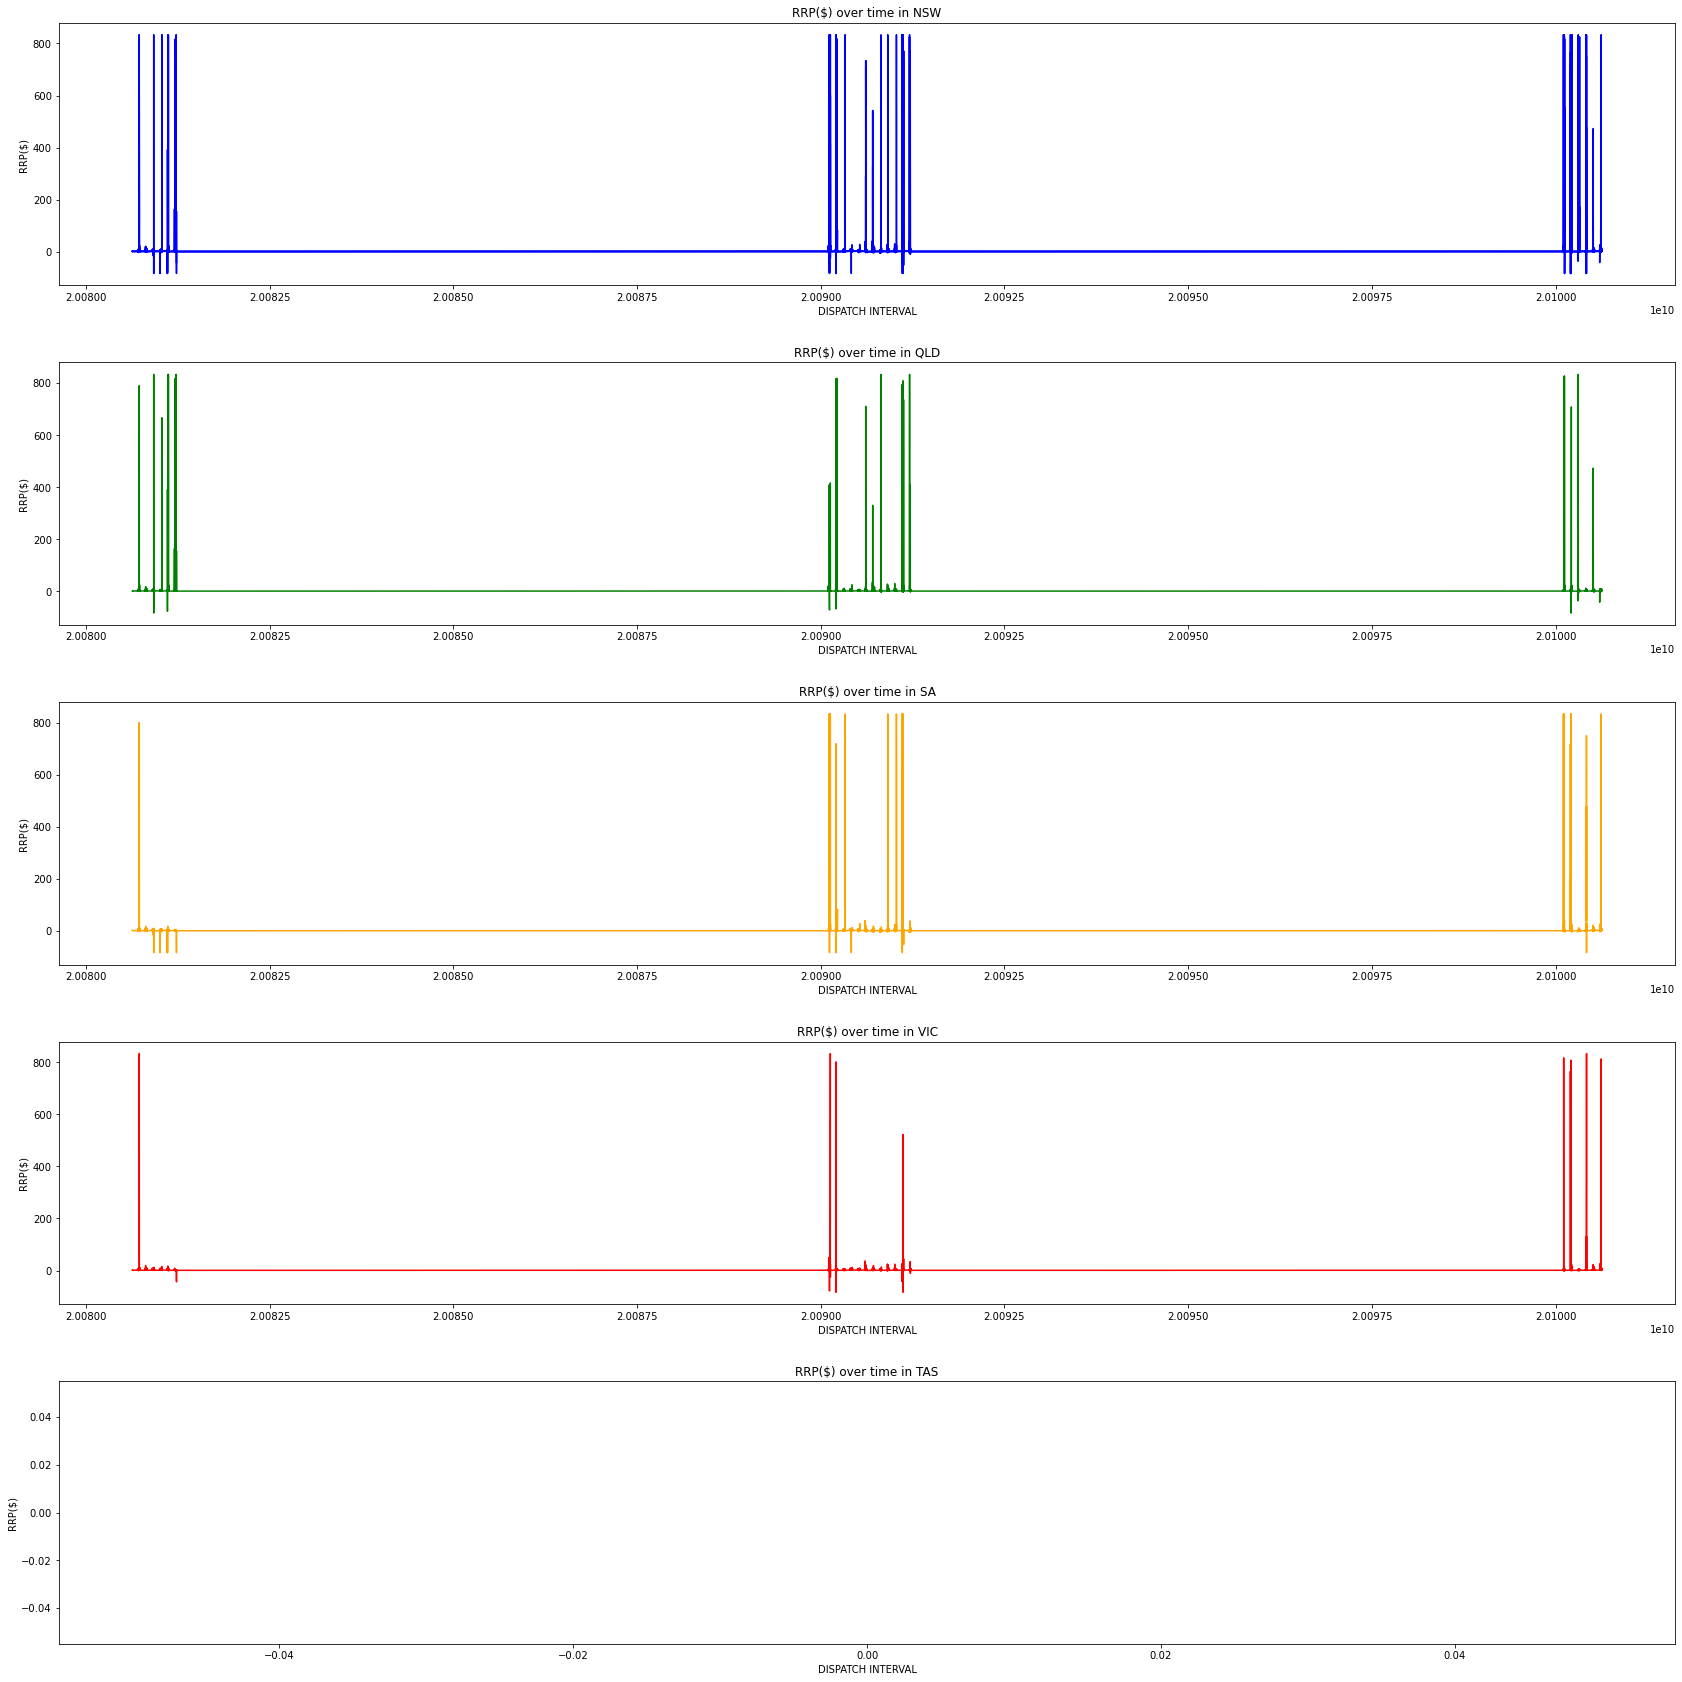

In [14]:
############### PRICES OVER TIME ###################
###### SHOWS HUGH VARIANCE IN PRICES ##############
##### IF WE CAPITALISE THESE BIG SPIKES THEN POTENTIAL FOR HIGH PROFITS ################
##### PRICES IN ONE REGION SHOWS SIMILAR PATTERN TO ALL OTHER STATES ############

def price_plot(axs, data, title, col):
    axs.plot("DISPATCHINTERVAL", "RRP5min", color = col, data = data)
    axs.set_xlabel("DISPATCH INTERVAL")
    axs.set_ylabel("RRP($)")
    axs.set_title(title)

fig, axs = plt.subplots(5, figsize = [24,24])

# Colour 
col = ["blue", "green", "pink", "orange", "purcple"]

j = 0
for i in dataset:
    price_plot(axs[j], i, "RRP($) over time in {}".format(region[j]), col[j])
price_plot(axs[0], dataNSW, "RRP($) over time in NSW", "blue")
price_plot(axs[1], dataQLD, "RRP($) over time in QLD", "green")
price_plot(axs[2], dataSA, "RRP($) over time in SA", "orange")
price_plot(axs[3], dataVIC, "RRP($) over time in VIC", "red")
price_plot(axs[4], dataTAS, "RRP($) over time in TAS", "purple")
fig.tight_layout(pad=3.0)

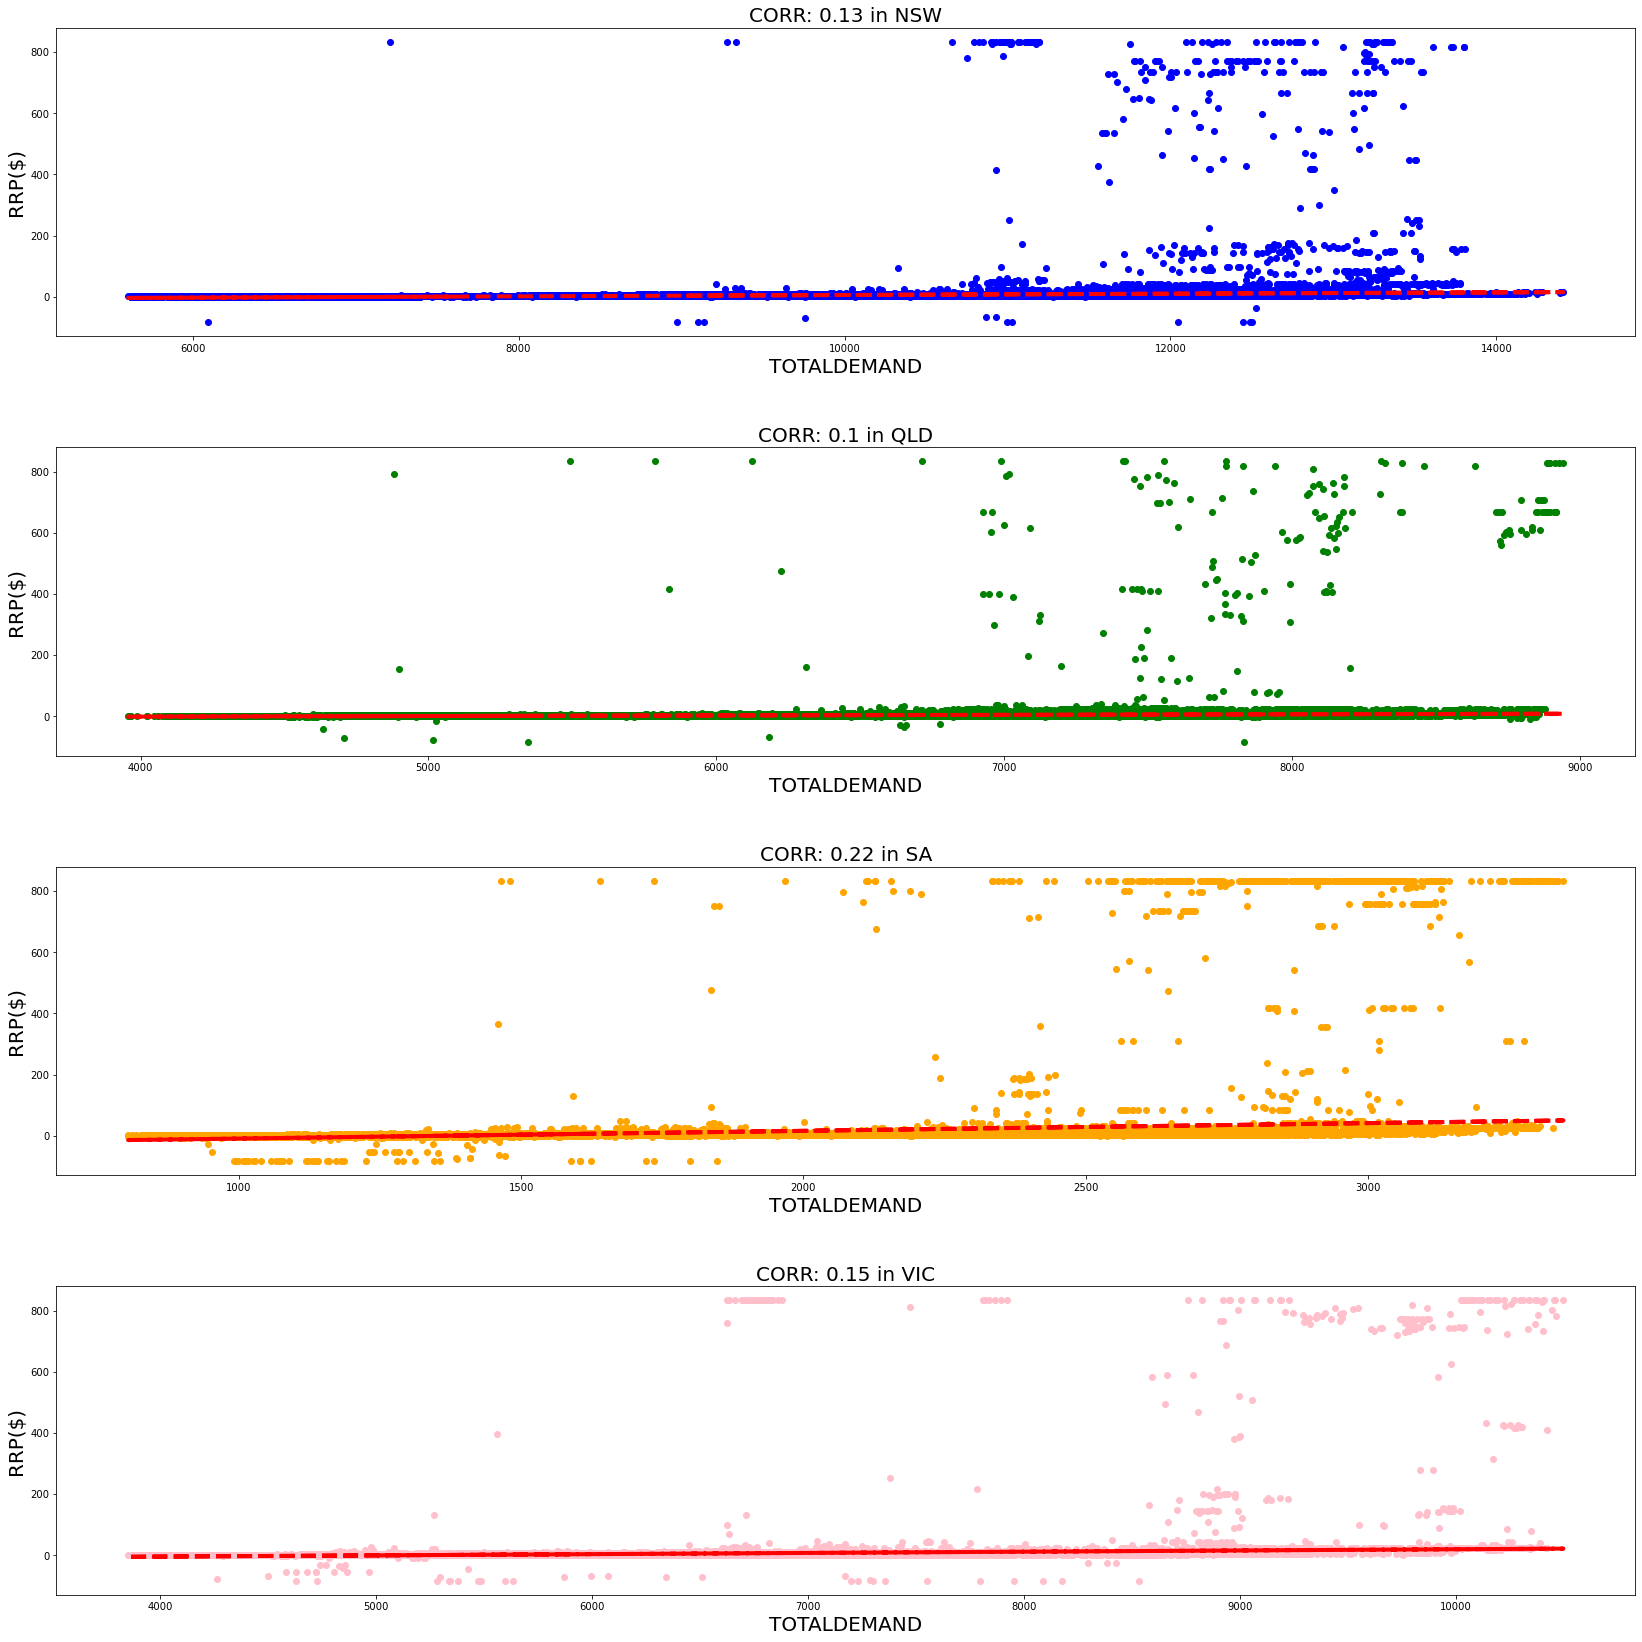

In [15]:
############## RELATIONSHIP BETWEEN PRICE & DEMAND ########################

# Function to draw the scatter
def price_demand_plot(axs, data, region, col):
    cor = round(np.corrcoef(data["TOTALDEMAND"], data["RRP5min"])[1][0], 2)
    axs.scatter("TOTALDEMAND", "RRP5min", color = col, data = data)
    axs.set_xlabel("TOTALDEMAND", fontsize = 20)
    axs.set_ylabel("RRP($)", fontsize = 20)
    axs.set_title("CORR: {} in {}".format(cor, region), fontsize = 20)
    line = give_me_a_straight_line(data["TOTALDEMAND"],data["RRP5min"])
    axs.plot(data["TOTALDEMAND"],line,'r--', linewidth = 4)
    
# Function to draw line of best fit
def give_me_a_straight_line(x,y):
    w, b  = np.polyfit(x,y,deg=1)
    line  = w * x + b
    return line

fig, axs = plt.subplots(4, figsize = [24,24])
plt.rc('xtick', labelsize=20)  
plt.rc('ytick', labelsize=20)  

price_demand_plot(axs[0], dataNSW, "NSW", "blue")
price_demand_plot(axs[1], dataQLD, "QLD", "green")
price_demand_plot(axs[2], dataSA, "SA", "orange")
price_demand_plot(axs[3], dataVIC, "VIC", "pink")
fig.tight_layout(pad=5.0)

########### VERY SMALL POSITIVE CORRELATION #################

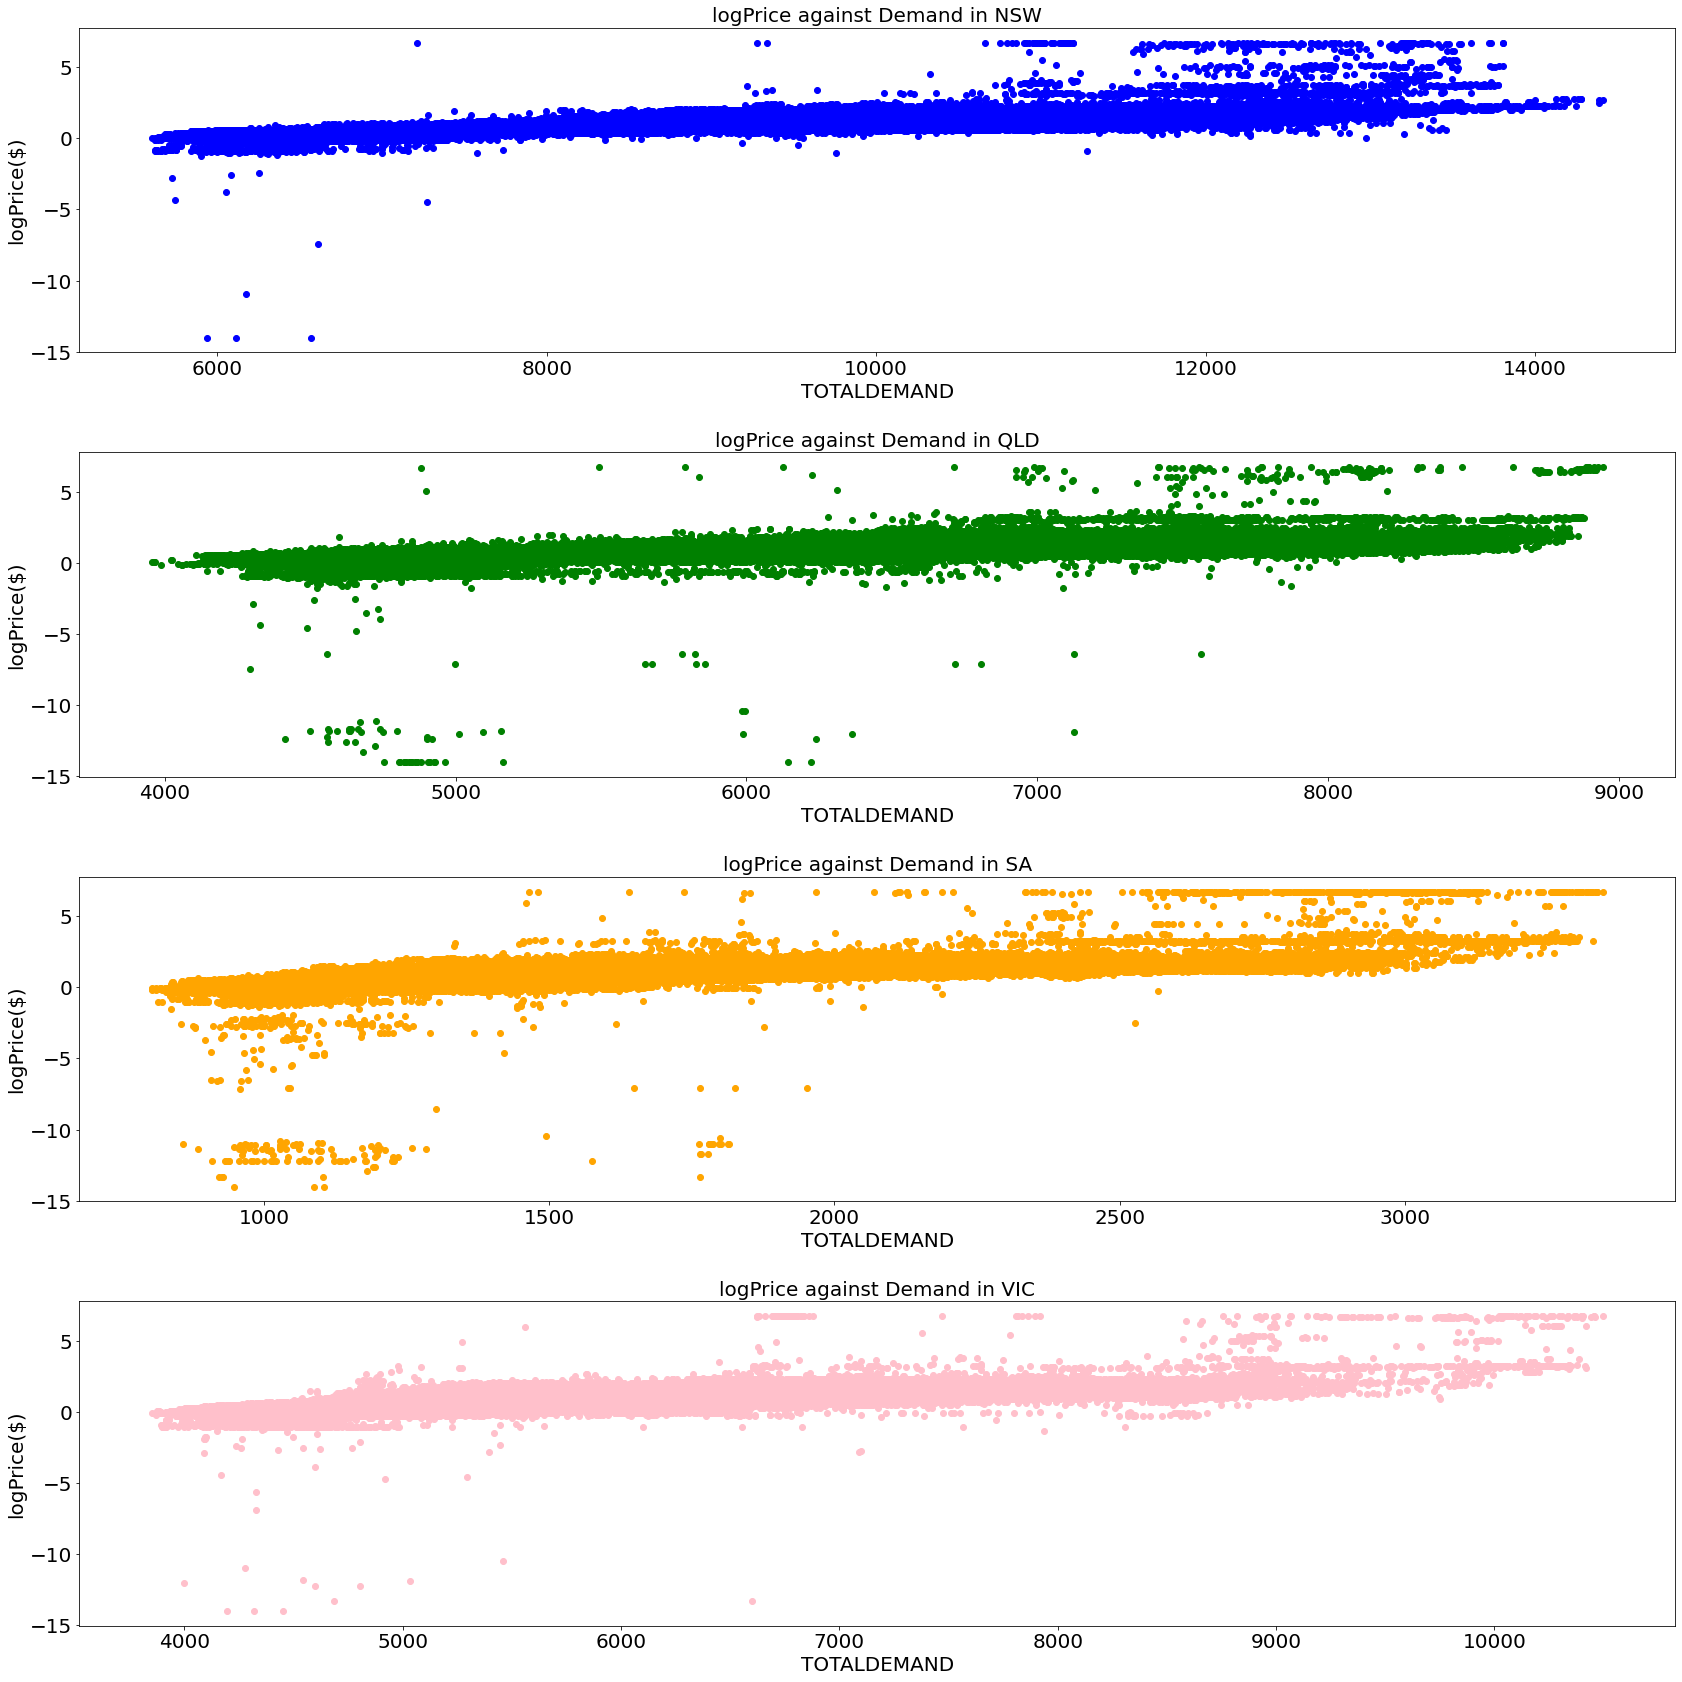

In [16]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

######## WE SEE IN ABOVE PLOTS THAT HIGH VARIABILITY IN PRICING RIPS APART EVERYTHING #####################
######### LETS TRY LOG OF PRICES TO DETER THE PROBLEM ######################

# data["logPrice"] = np.log(data["RRP5min"])
##### WE DO THIS WORKING ABOVE BEFORE SPLITTING DATASET INTO REGIONS #####################

##### LETS NOW PLOT THAT ABOVE SCATTERS AGAINST LOG PRICE

# Function to draw the scatter

def price_demand_plot_1(axs, data, region, col):
   # cor = round(np.corrcoef(data["TOTALDEMAND"], data["logPrice"])[1][0], 2)
    axs.scatter("TOTALDEMAND", "logPrice", color = col, data = data)
    axs.set_xlabel("TOTALDEMAND", fontsize = 20)
    axs.set_ylabel("logPrice($)", fontsize = 20)
    axs.set_title("logPrice against Demand in {}".format(region), fontsize = 20)
    
fig, axs = plt.subplots(4, figsize = [24,24])
plt.rc('xtick', labelsize=20)  
plt.rc('ytick', labelsize=20)  


price_demand_plot_1(axs[0], dataNSW, "NSW", "blue")
price_demand_plot_1(axs[1], dataQLD, "QLD", "green")
price_demand_plot_1(axs[2], dataSA, "SA", "orange")
price_demand_plot_1(axs[3], dataVIC, "VIC", "pink")
fig.tight_layout(pad=3.0)

############## THIS LOOKS MUCH BETTER #####################
############### VARIABILITY REDUCED ####################

In [17]:
# LETS QUANTIFY THIS CORRELATION
j = 0
for i in dataset:
    print("Correlation between lopPrice & Total Demand in {}: ".format(region[j]), i.corr(method = "pearson")["logPrice"][1])
    j+=1

######## LOOKS LIKE LOG PRICE WORKS WELL #############
######## WE WILL USE FOR FURTHER ANALYSIS ###################

Correlation between lopPrice & Total Demand in NSW1:  0.6769494706842244
Correlation between lopPrice & Total Demand in QLD1:  0.5650641213544843
Correlation between lopPrice & Total Demand in SA1:  0.6564744518411967
Correlation between lopPrice & Total Demand in TAS1:  nan
Correlation between lopPrice & Total Demand in VIC1:  0.7123698400465264


In [18]:
import datetime as dt

In [19]:
data.head()

,SETTLEMENTDATE,REGIONID,DISPATCHINTERVAL,TOTALDEMAND,APCFLAG,RRP5min,logPrice,year,month,day,minute
0,2008-01-07 00:00:00,NSW1,20080630240,9027.49,0,2.286419,0.826987,2008,2008-01,2008-01-07,0
1,2008-01-07 00:00:00,QLD1,20080630240,5361.52,0,2.025000,0.705570,2008,2008-01,2008-01-07,0
2,2008-01-07 00:00:00,SA1,20080630240,1614.93,0,2.480860,0.908605,2008,2008-01,2008-01-07,0
5,2008-01-07 00:00:00,VIC1,20080630240,5898.26,0,2.330601,0.846126,2008,2008-01,2008-01-07,0
6,2008-01-07 00:05:00,NSW1,20080630241,9067.65,0,2.318333,0.840849,2008,2008-01,2008-01-07,5


In [21]:
monthly_price_avg = pd.DataFrame(data.groupby("month")["RRP5min"].mean())
monthly_price_avg.index = monthly_price_avg.index.astype(str)

Text(0.5, 1.0, 'Price Pattern Over Time')

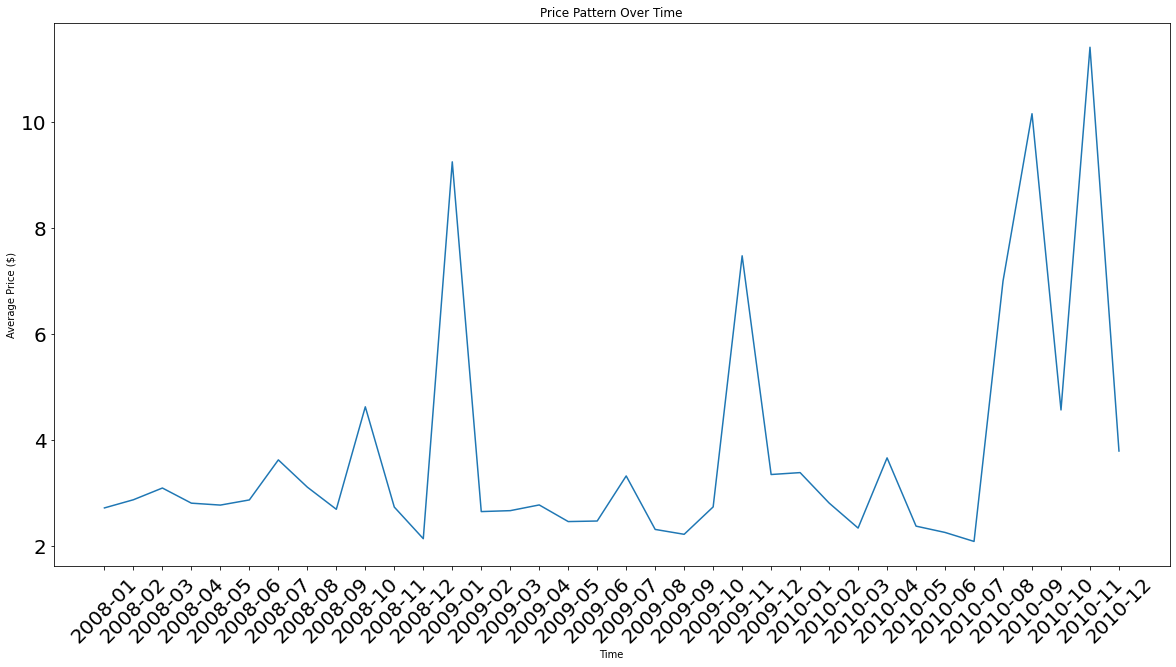

In [22]:
# NO TREND IN PRICE OVER TIME BUT SEASONALITY CLEARLY SEEN
# Peaks at end of the year
# AVG Prices over month
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.plot(monthly_price_avg)
plt.xlabel("Time")
plt.ylabel("Average Price ($)")
plt.title("Price Pattern Over Time")

In [23]:
## SAME ANALYSIS REGION WISE (TASMANIA EXCLUDED)
monthly_price_NSW_avg = pd.DataFrame(dataNSW.groupby("month")["RRP5min"].mean())
monthly_price_NSW_avg.index = monthly_price_NSW_avg.index.astype(str)

monthly_price_QLD_avg = pd.DataFrame(dataQLD.groupby("month")["RRP5min"].mean())
monthly_price_QLD_avg.index = monthly_price_QLD_avg.index.astype(str)

monthly_price_SA_avg = pd.DataFrame(dataSA.groupby("month")["RRP5min"].mean())
monthly_price_SA_avg.index = monthly_price_SA_avg.index.astype(str)

monthly_price_VIC_avg = pd.DataFrame(dataVIC.groupby("month")["RRP5min"].mean())
monthly_price_VIC_avg.index = monthly_price_VIC_avg.index.astype(str)

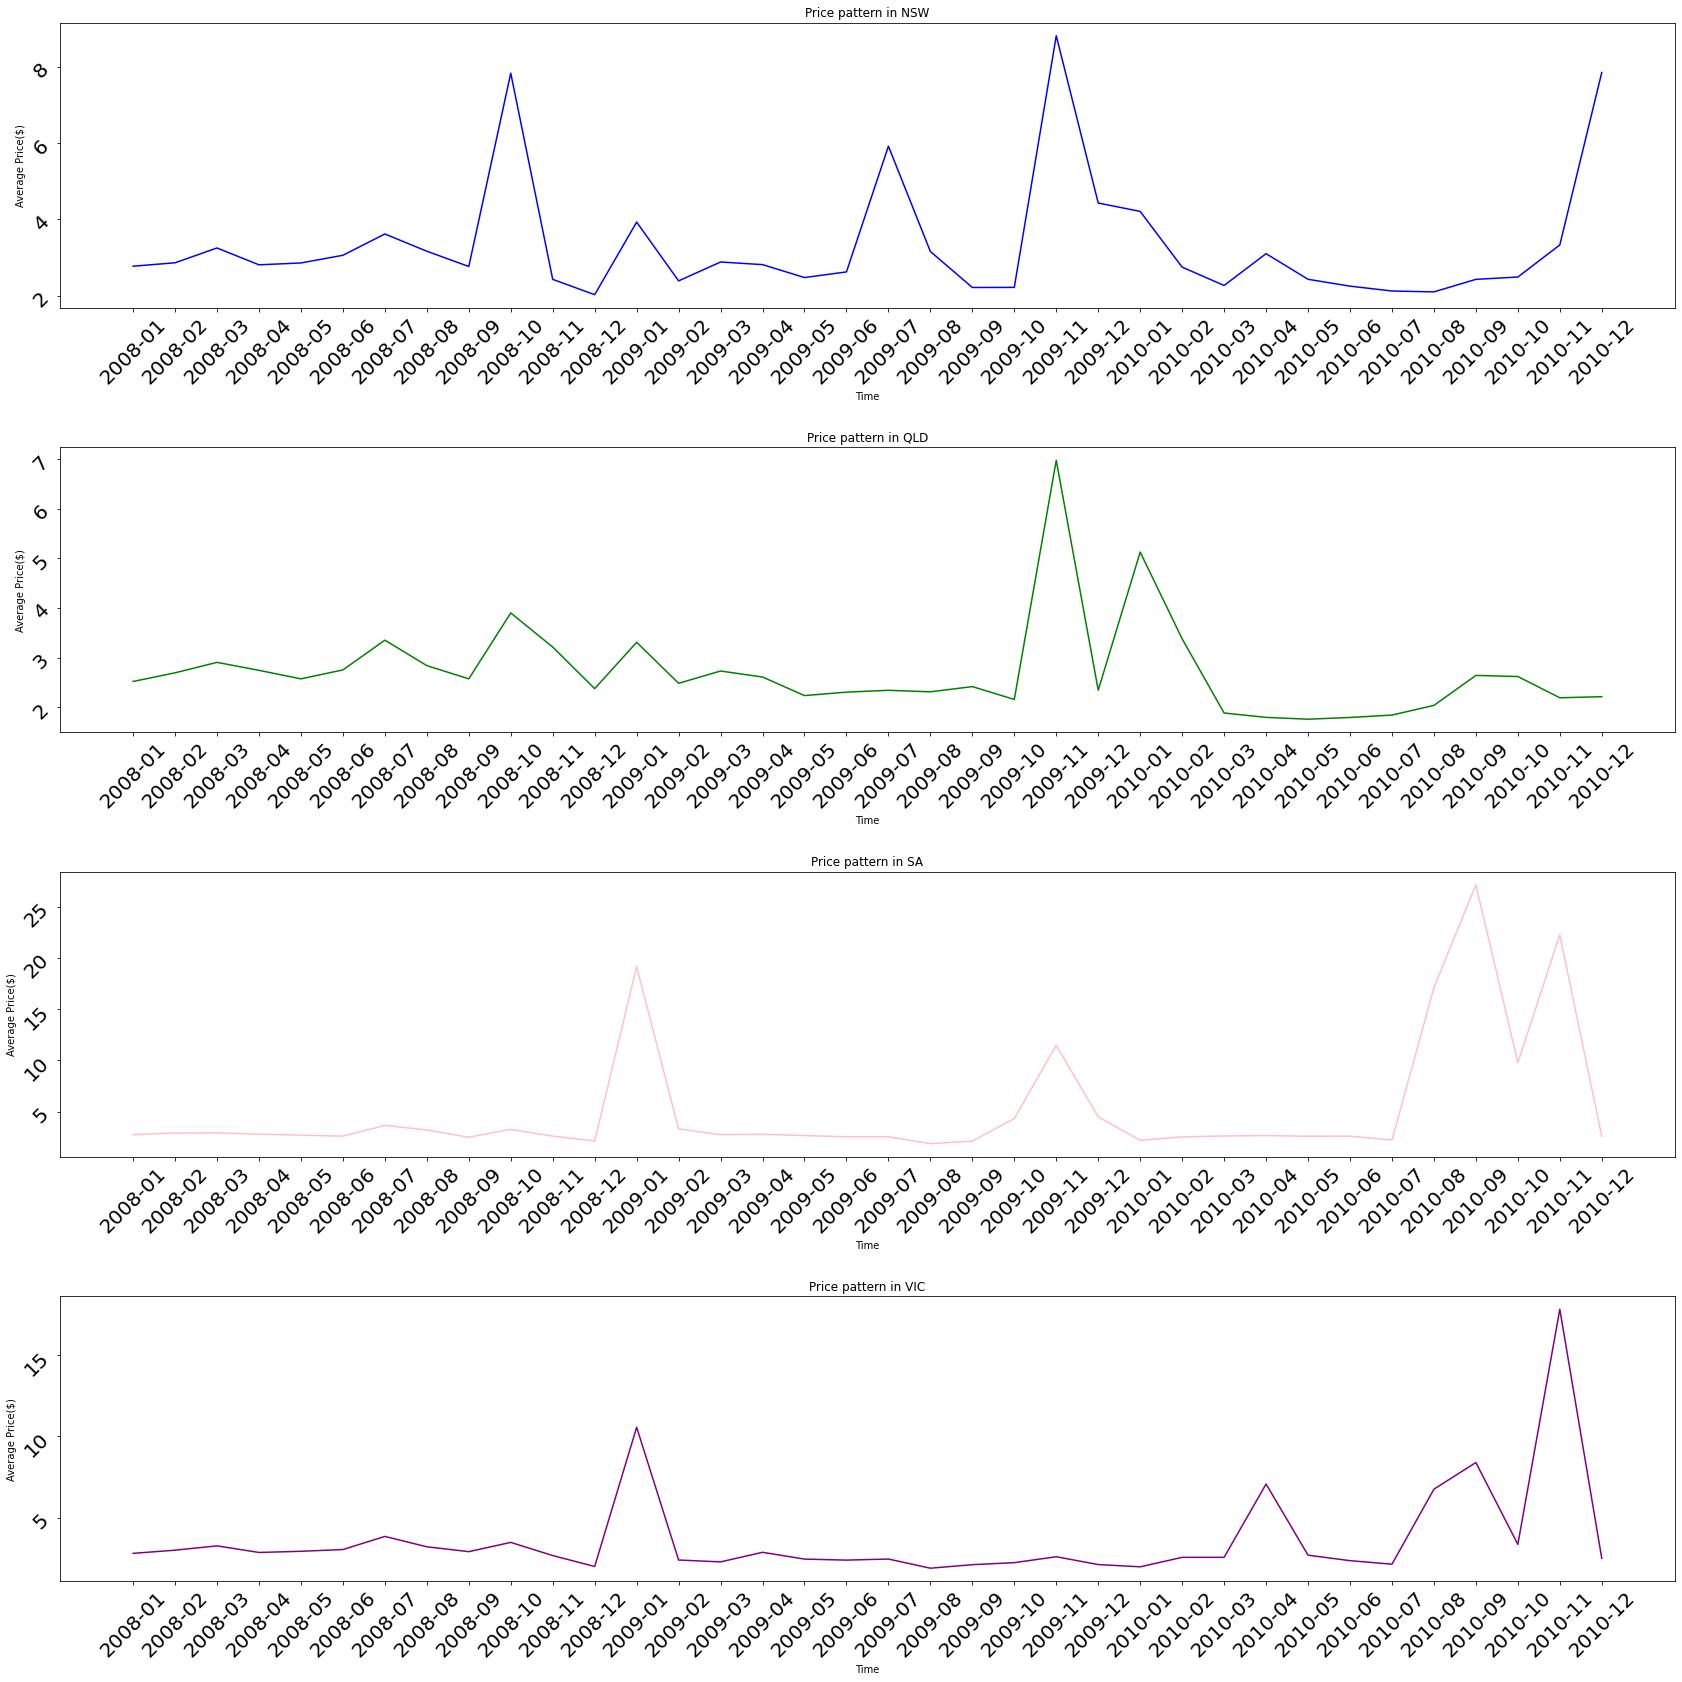

In [24]:
## PRICE PATTERN ACROSS REGIONS

def plot_price_pattern(axs, data, color, tit):
    axs.plot(data, color = color)
    axs.tick_params(labelrotation=45)
    axs.set_xlabel("Time")
    axs.set_ylabel("Average Price($)")
    axs.set_title(tit)
  

fig, axs = plt.subplots(4, figsize = [24,24])
plot_price_pattern(axs[0], monthly_price_NSW_avg, "blue", "Price pattern in NSW")
plot_price_pattern(axs[1], monthly_price_QLD_avg, "green", "Price pattern in QLD")
plot_price_pattern(axs[2], monthly_price_SA_avg, "pink", "Price pattern in SA")
plot_price_pattern(axs[3], monthly_price_VIC_avg, "purple", "Price pattern in VIC")
fig.tight_layout(pad=3.0)

In [25]:
daily_price_NSW_avg = pd.DataFrame(dataNSW.groupby("day")["RRP5min"].mean())
daily_price_NSW_avg.index = daily_price_NSW_avg.index.astype(str)

/Users/ahsan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


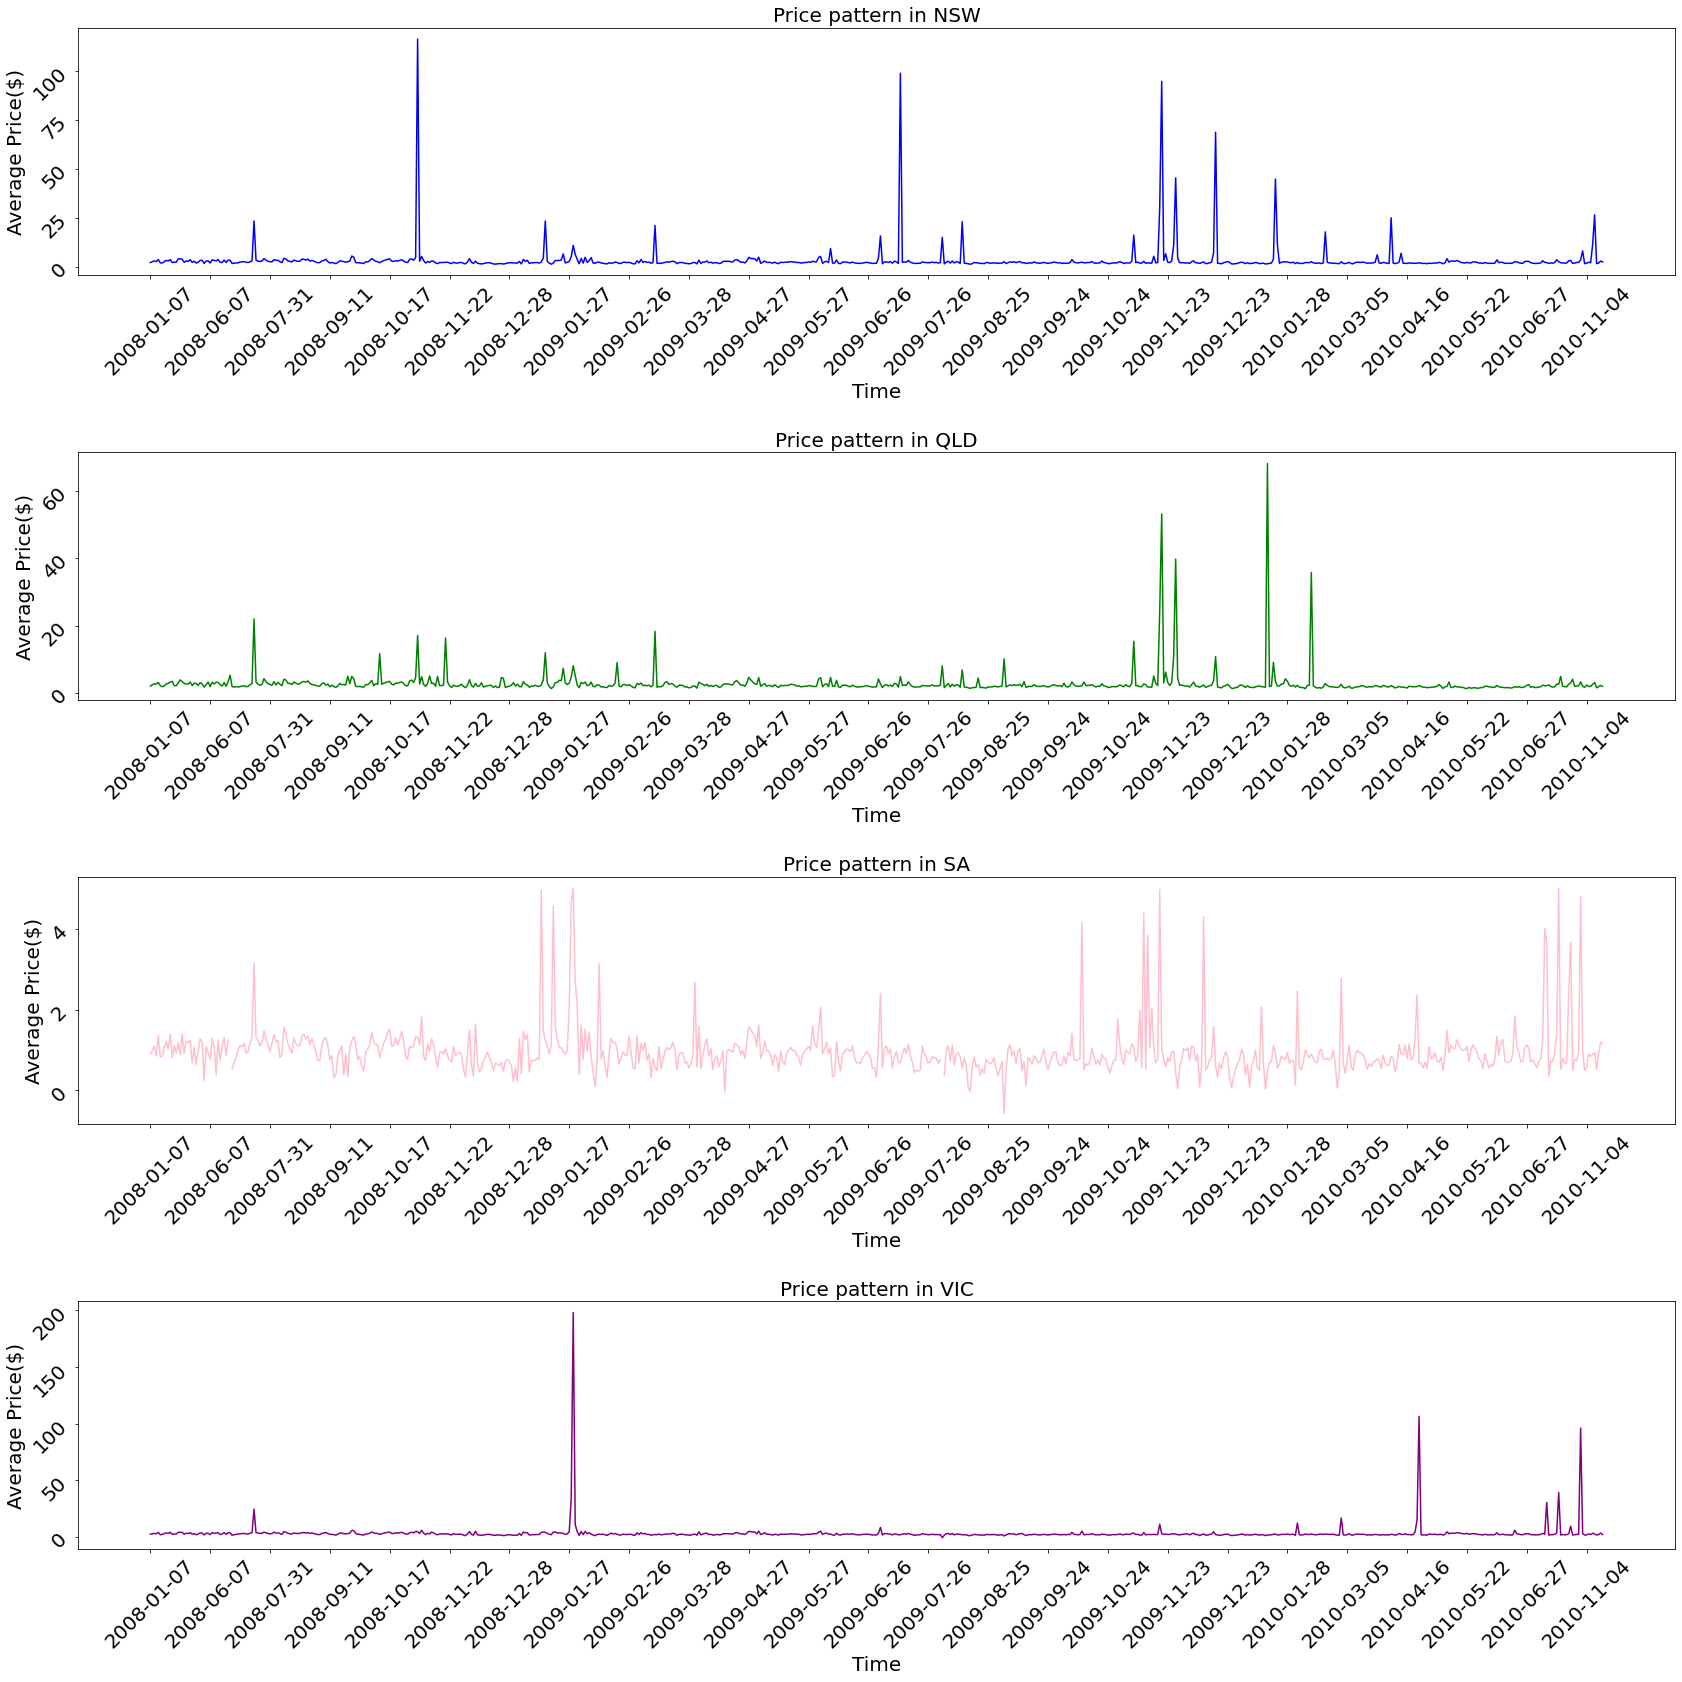

In [26]:
## DAILY CHART
## SAME ANALYSIS REGION WISE (TASMANIA EXCLUDED)
daily_price_NSW_avg = pd.DataFrame(dataNSW.groupby("day")["RRP5min"].mean())
daily_price_NSW_avg.index = daily_price_NSW_avg.index.astype(str)

daily_price_QLD_avg = pd.DataFrame(dataQLD.groupby("day")["RRP5min"].mean())
daily_price_QLD_avg.index = daily_price_QLD_avg.index.astype(str)

daily_price_SA_avg = pd.DataFrame(np.log(dataSA.groupby("day")["RRP5min"].mean()))
daily_price_SA_avg.index = daily_price_SA_avg.index.astype(str)

daily_price_VIC_avg = pd.DataFrame(dataVIC.groupby("day")["RRP5min"].mean())
daily_price_VIC_avg.index = daily_price_VIC_avg.index.astype(str)

def plot_price_pattern_daily(axs, data, color, tit):
    axs.plot(data, color = color)                                              
    axs.tick_params(axis = "x", labelrotation=45)
    xticks = axs.xaxis.get_major_ticks()                                               
    axs.tick_params(labelrotation=45)
    axs.set_xlabel("Time", fontsize = 20)
    axs.set_ylabel("Average Price($)", fontsize = 20)
    axs.set_title(tit, fontsize = 20)
    for i,tick in enumerate(xticks):
        if i%30 != 0:
            tick.label.set_visible(False)
            tick.set_visible(False)                                               


                                                   
fig, axs = plt.subplots(4, figsize = [24,24])
plt.rc('xtick', labelsize=5)  
plt.rc('ytick', labelsize=20)  

plot_price_pattern_daily(axs[0], daily_price_NSW_avg, "blue", "Price pattern in NSW")
plot_price_pattern_daily(axs[1], daily_price_QLD_avg, "green", "Price pattern in QLD")
plot_price_pattern_daily(axs[2], daily_price_SA_avg, "pink", "Price pattern in SA")
plot_price_pattern_daily(axs[3], daily_price_VIC_avg, "purple", "Price pattern in VIC")
fig.tight_layout(pad=3.0)

                                                   


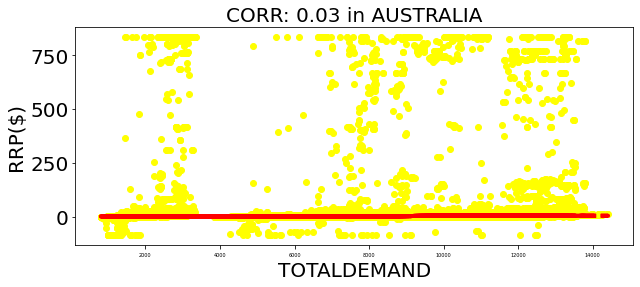

In [27]:
fig, axs = plt.subplots(1, figsize = [10,4])
plt.rc('xtick', labelsize=20)  
plt.rc('ytick', labelsize=20)  

price_demand_plot(axs, data, "AUSTRALIA", "YELLOW")

0.6769494706842244

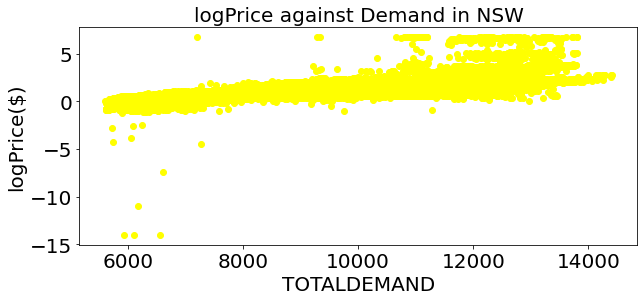

In [28]:
fig, axs = plt.subplots(1, figsize = [10,4])
plt.rc('xtick', labelsize=20)  
plt.rc('ytick', labelsize=20) 

price_demand_plot_1(axs, dataNSW, "NSW", "yellow")
dataNSW.corr(method = "pearson")["logPrice"][1]

In [29]:
dataNSW

,SETTLEMENTDATE,REGIONID,DISPATCHINTERVAL,TOTALDEMAND,APCFLAG,RRP5min,logPrice,year,month,day,minute
0,2008-01-07 00:00:00,NSW1,20080630240,9027.49,0,2.286419,0.826987,2008,2008-01,2008-01-07,0
6,2008-01-07 00:05:00,NSW1,20080630241,9067.65,0,2.318333,0.840849,2008,2008-01,2008-01-07,5
11,2008-01-07 00:10:00,NSW1,20080630242,9115.77,0,2.318333,0.840849,2008,2008-01,2008-01-07,10
16,2008-01-07 00:15:00,NSW1,20080630243,9049.75,0,2.318333,0.840849,2008,2008-01,2008-01-07,15
21,2008-01-07 00:20:00,NSW1,20080630244,8935.08,0,2.311673,0.837972,2008,2008-01,2008-01-07,20
...,...,...,...,...,...,...,...,...,...,...,...
1048551,2010-06-29 03:50:00,NSW1,20100628286,7608.19,0,1.833327,0.606132,2010,2010-06,2010-06-29,50
1048556,2010-06-29 03:55:00,NSW1,20100628287,7576.66,0,1.833324,0.606131,2010,2010-06,2010-06-29,55
1048561,2010-06-29 04:00:00,NSW1,20100628288,7533.81,0,1.833324,0.606131,2010,2010-06,2010-06-29,0
1048566,2010-06-29 04:05:00,NSW1,20100629001,7533.56,0,1.791667,0.583146,2010,2010-06,2010-06-29,5
